In [1]:
%matplotlib inline
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

c:\ipynot~1\intro-ml\venv\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
c:\ipynot~1\intro-ml\venv\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Neural Networks (Deep Learning)

Deep learning shows great promise in many machine learning applications but these algorithms are often tailored specifically to a use case. Here we will only discuss simple methods, mainly __multilayer perceptrons__ for classification and regression, which will serve as the starting point for more complex deep learning methods.  Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks.

### The neural network model

MLPs can be seen as generalization of linear models that perform multiple stages of processing to make a final decision.  Remember the linear regressor given by:

$$ \hat{y} = w[0] * x[0] + w[1] * x[1] + . . . + w[p] * x[p] + b$$

This can be visualized graphically as:

![linear regressor viz](img/nn.png)

Here each node on the left is an input feature, the connecting lines are the coefficients and right hand side is the output, which is the weighted sum of the inputs.

In an MLP, this process if computing weights is repeated multiple times.  First the __hidden units__ representing the intermediate processing steps which are then combined using weighted sums to yield the final output.

![nn viz](img/nn2.png)

This has many more coefficients to learn.  There is one between every input and every hidden unit and then from every hidden unit to the output.  Computing the a series of weighted sums is mathematically the same as cuputing just one. To make the neural networks more powerful than linear models we need one more trick.  After the weighted sum is computed for each hidden unt, a non-linear function is applied to the result, usually the __rectifying nonlinearity__ (aka rectified linear unit or relu)or the __tangens hyperbolicus__ (tanh).  The result of this function is then uses in the weighted sum that computes the output.  The relu cuts of values less than zero while tanh saturates to -1 for low inputs and 1 for high input.  Both of these functions allow fow more complicated learning than a linear model.

Here are the functions visualized:

Text(0, 0.5, 'relu(x), tanh(x)')

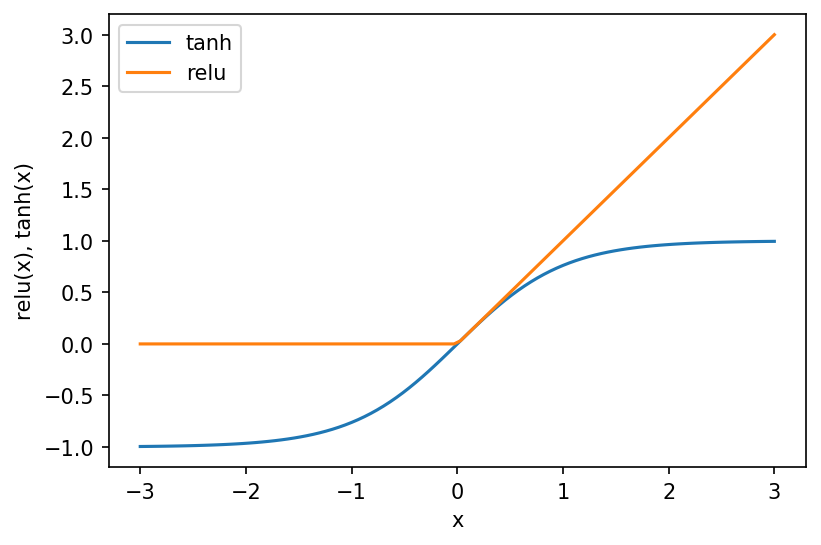

In [2]:
line = np.linspace(-3, 3, 100)
plt.figure(dpi=150)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

For the small neural network we showed above the full formula is:

$$h[0] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3] + b[0])$$
$$h[1] = tanh(w[0, 1] * x[0] + w[1, 1] * x[1] + w[2, 1] * x[2] + w[3, 1] * x[3] + b[1])$$
$$h[2] = tanh(w[0, 2] * x[0] + w[1, 2] * x[1] + w[2, 2] * x[2] + w[3, 2] * x[3] + b[0])$$
$$\hat{y} = v[0] * h[0] + v[1] * h[1] + v[2] * h[2] + b$$

where the $w$'s are the weights between input ($x$) and hidden layer ($h$) and the $v$'s are the weights between the hidden layer and the output ($\hat{y}$).

Important parameter to set is the number of nodes in the hidden layer. For small and simple data sets 10 may be sufficient but for large, complex sets of data we might need as many as 10,000.  We an also add mutiple hidden layers.

![2-layer neural network viz](img/nn3.png)

The many layers of hidden layers inspired the term "deep learning".

### Tuning neural networks

We'll see how an MLP works by applying the `MLPClassifier` to the `two_moons` dataset.

Text(0, 0.5, 'Feature 1')

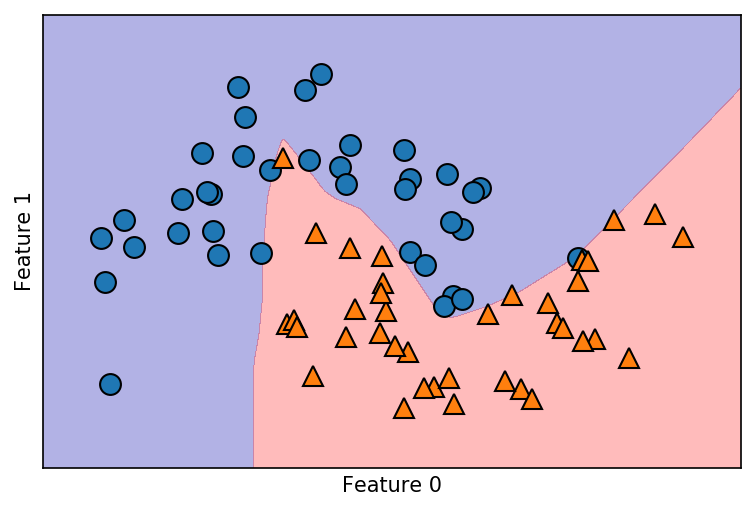

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)

plt.figure(dpi=150)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

We see that it returns a non-linear but still smooth decision curve.  By default MLP uses 100 hidden nodes.  We can reduce this and still get a good result.

Text(0, 0.5, 'Feature 1')

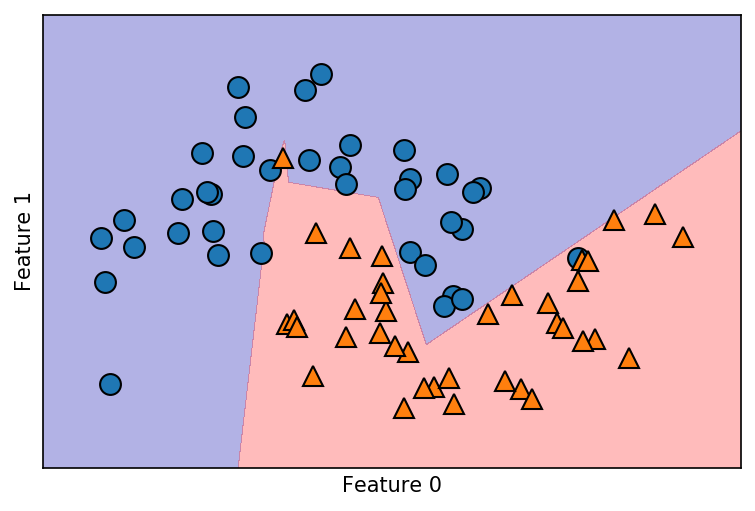

In [4]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)

plt.figure(dpi=150)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

This result is pretty jagged.  By default MLP uses relu so the result is a product of straight line segements.  We can smooth it out by ading more nodes, more layers, or using tanh instead.

Text(0, 0.5, 'Feature 1')

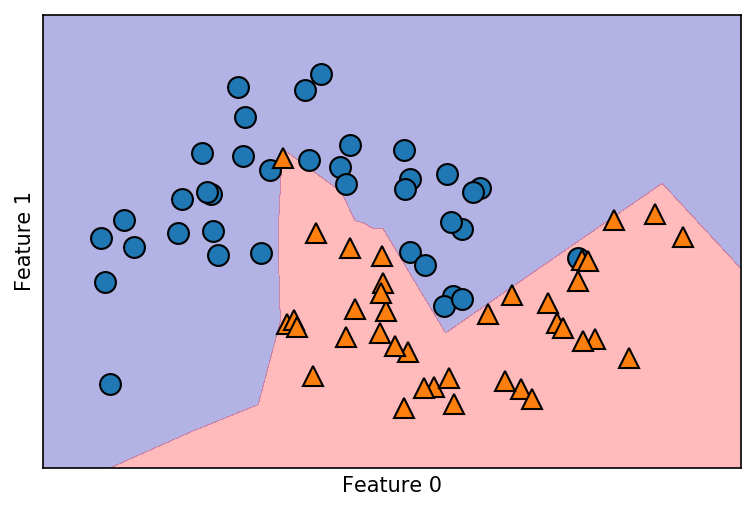

In [5]:
# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)

plt.figure(dpi=150)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

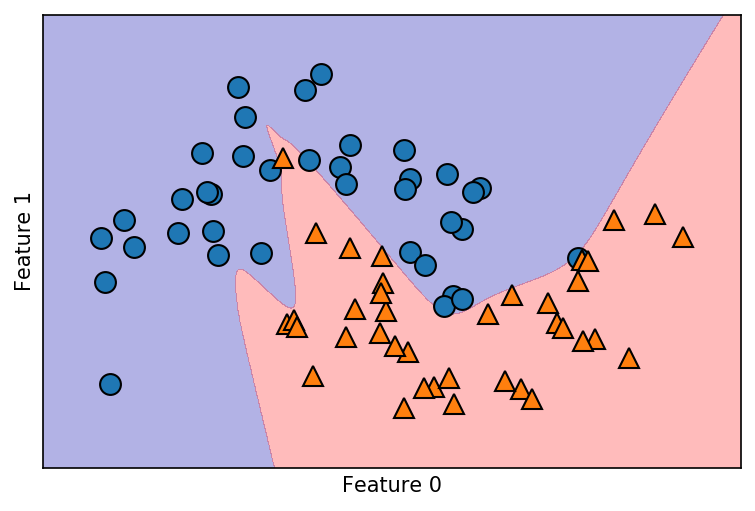

In [6]:
# using two hidden layers, with 10 units each, now with tanh nonlinearity
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)

plt.figure(dpi=150)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


We can also control model complexity by using an L2 penalty to push the weights to zero like in ridge regression.  TO do this we change `MLPClassifier`'s parameter `alpha`.  Low values for `alpha` are little regularization and the default for `MLPClassifier`.

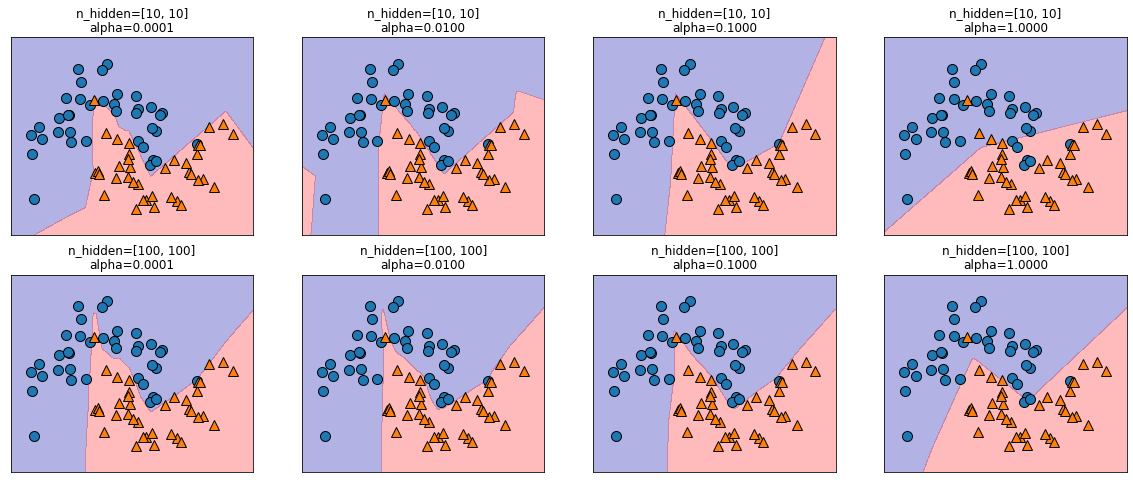

In [7]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

There are even more parameters we can tune but they will not be covered.  Another important note is that the weights are randomly set before learning is started. We can get vastly different results if the model's random state isn't seeded even with the same parameters.  This doesn't effect large complex models as much but it is something to keep in mind.  Here is an illustration of different results from the same parameters but different random states.

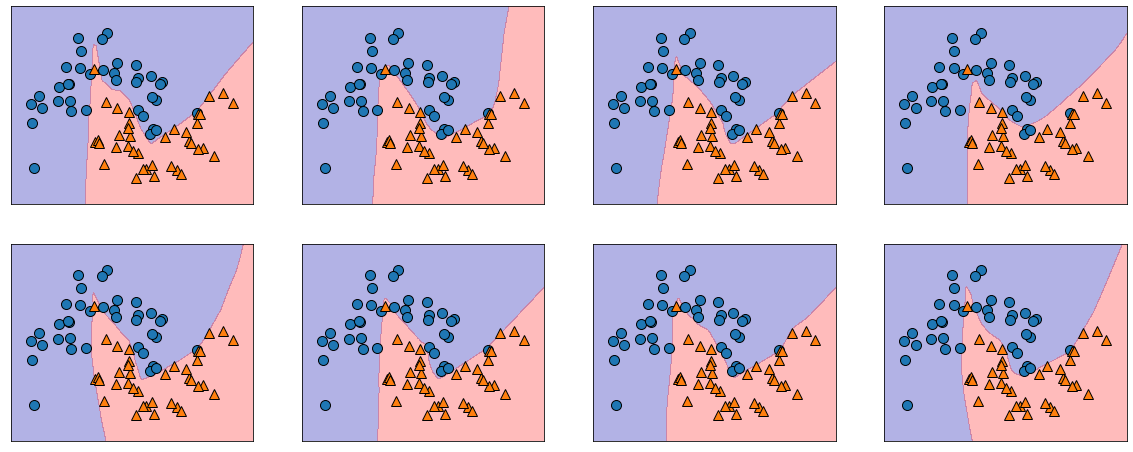

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

Now we will look at neural networks on real data.

In [9]:
cancer = load_breast_cancer()
print("Cancer data per-feature maxima:\n{}\n".format(cancer.data.max(axis=0)))

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]

Accuracy on training set: 0.94
Accuracy on test set: 0.92


The MLP does pretty well but not as god as some other models., likely due to the scaling of the data.  NNs, like the SVC example, expect all features to vary in similar ways, ideally having means of zero, and variance of 1.  So we must scale our data to meet these requirements.  Again we will do this by hand, and in chapter 3, the `StandardScaler` method will be discussed.

In [10]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train

# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


c:\ipynot~1\intro-ml\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


This is already better but we get a warning from the model.  This is part of the `adam` algorithm that `scikit-learn` uses for learning this model by default.  It suggests we should increase the iterations.  We can also attempt to increase model performance by tuning the parameter `alpha` which changes the regularization of the weights.

In [11]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [12]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)  # Agreesive change in alpha default from 0.0001 to 1
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


Ultimately we are able to get a model that is on par with the the very best of the others that have been discussed.

But now how do we analyze how and what the model learned?  With a NN this is trickier than it would be with linear or tree-based models.  One way to analyze a NN though is to look at the weights in the model.  In the plot the rows represent the features and the columns represent the 100 hidden units.

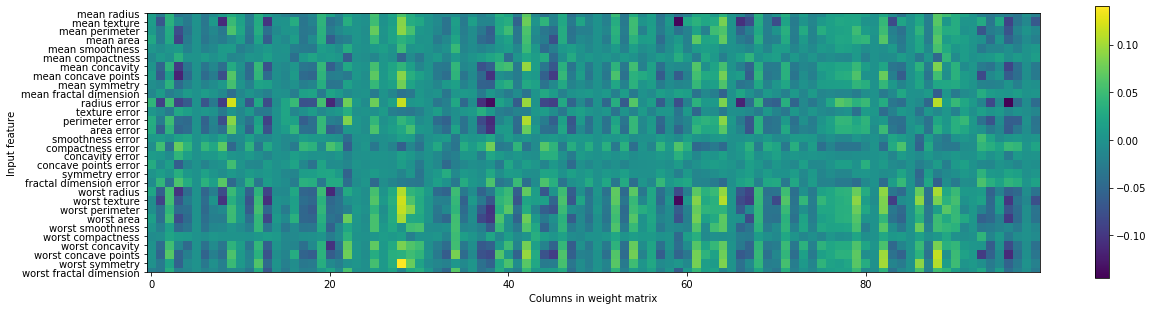

In [13]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

We might make the assumption that features that have small weights would be less important to the model.  For example, the "mean smoothness" and "mean compactness" as well as the features from "smoothness error" to "fractal dimension error" in the chart have small weights compared to other features.  This might mean they are less important or that they could have been represented in a way that the NN couldn't use them effectively.  We could also visualize the weights from the hidden layer to the output but this would be even more dificult to understand.

While the `MLPClassifier` and `MLPRegressor` are easy to use interfaces for basic NNs, they only cover a small subset of what is possible with them. For larger scale model and datasets, libraries outside of `scikit-learn` should be used.  In Python, `keras`, `lasagne`, and `tensor-flow` are popular options. `lasagne` build on the `theano` library, while `keras` can use `theano` or `tensor-flow`.  These libraries are more flexible for training NNs and allow for GPU acceleration of training and predicting.

### Strengths, weaknesses, and parameters

NNs have reemerged as state-of-the-art models in many ML applications.  The main advantage is to capture info im very large datasets and for building very complex models.  With enough computation time, data, and tuning, NNs often are better than other ML methods for both classification and regression.  

On the downsides, these models often take a long time to train (especially large and powerful models).  They also take careful preprocessing of the data like the SVMs where the data is also homogenous.  FOr non-homogenous datasets where features are very different a tree-based approach is often better.  Tuning a NN is also a project in intself and the surface was only scratched in this tuning example.

### Estimating NN complexity

The most important unit is the number of hidden layers and the number of hidden units for these layers.  Usually you should start with one or two hidden layers and exapnd from there.  The nodes per layer is usually around the number of input features but rarely will it be higher than mid-thousands.  A helpful measure for model complexity is the number of weights learned.  For a two layered model with 100 hidden units per layer and 100 input features there would be $100 \times 100$ from input to first layer, $100 \times 100$ from first to second hidden layer, and $100 \times 1$ from last hidden layer to the output for a total of 20100 weights.

A common way to set parameters is to create the NN large enough to overfit and then tune the model to shrink it or increase alpha to add regularization to the NN.

In the example above we also focused on the parameters that define the model.  But we can also define _how_ the model learns.  To do this we set the `algorithm` parameter.  The default is `'adam'`  but it is sensitive to scaling of the data so it needs to be scaled to have a mean of 0 and a unit variance.  A more robust method is `'lbfgs'` but it can take a long time on larger models or datasets.  A more advanced option is `'sgd'` but it comes with more parameters to tune for best results.  For new users `'adam'` and `'lbfgs'` shoudl be used.


#### `fit` _method resets a model_

An important thing to know about `scikit-learn` is that calling `fit` on a model object  resets the previous learning.  So if it is built on one dataset and then `fit` to a new dataset,  the training is only on that new dataset.